In [11]:
# 구글에서 제공하는 GPU를 이용해서 계산하기
!pip install tensorflow-gpu==2.2.0

In [12]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [13]:
# 관련 모듈을 전부 import
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
X = iris.iloc[:, 0:4].values # ndarray 2차원 (float64)
y = iris.iloc[:, 4].values   # ndarray 1차원 (문자)

le = LabelEncoder()
y1 = le.fit_transform(y)     # 0, 1, 2
Y= pd.get_dummies(y1).values # ndarray 2차원 one hot encoding이 완료된 데이터
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [17]:
# 위에서 전처리가 끝난 X, Y를 훈련/검증 데이터로 나눈다.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [18]:
# 모델 생성
model = Sequential()

model.add(Dense(64, activation="relu", input_shape=(4, ) ))
model.add(Dense(64, activation="relu" ))
model.add(Dense(3, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy']) # SGD, MSE

In [20]:
hist = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test) )

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 863us/step - loss: 1.1321 - accuracy: 0.2750 - val_loss: 1.1500 - val_accuracy: 0.2000
Epoch 2/100
120/120 [==============================] - 0s 142us/step - loss: 1.0240 - accuracy: 0.3667 - val_loss: 1.0332 - val_accuracy: 0.2000
Epoch 3/100
120/120 [==============================] - 0s 136us/step - loss: 0.9458 - accuracy: 0.4083 - val_loss: 0.9516 - val_accuracy: 0.5667
Epoch 4/100
120/120 [==============================] - 0s 136us/step - loss: 0.8793 - accuracy: 0.6917 - val_loss: 0.9125 - val_accuracy: 0.5667
Epoch 5/100
120/120 [==============================] - 0s 130us/step - loss: 0.8296 - accuracy: 0.6917 - val_loss: 0.8734 - val_accuracy: 0.5667
Epoch 6/100
120/120 [==============================] - 0s 118us/step - loss: 0.7780 - accuracy: 0.6917 - val_loss: 0.7939 - val_accuracy: 0.5667
Epoch 7/100
120/120 [==============================] - 0s 133us/step - loss: 0.7268 -

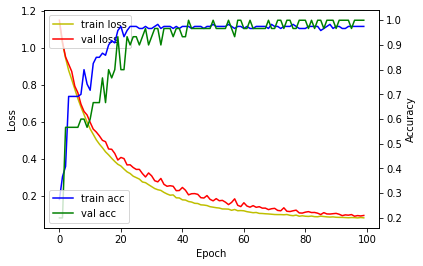

In [21]:
# 학습 과정을 그래프로 그래보기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('Epoch')
loss_ax.set_ylabel('Loss')

acc_ax.set_ylabel('Accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [25]:
# 혼동행렬 (Confusion Matrix)
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_test_p1 = np.argmax(y_test, axis=1)
y_test_p2 = np.argmax(y_pred, axis=1)

print(classification_report(y_test_p1, y_test_p2))
print(confusion_matrix(y_test_p1, y_test_p2 ))   

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
